##                                                         Linear Regression Model

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Loading Data
df = pd.read_csv("Lineardata_train.csv")

In [3]:
# Shuffle the dataframe values
np.random.seed(42)
df_shuffled = df.sample(frac=1).reset_index(drop=True)
df_values = df_shuffled.values

In [4]:
# Split the data into features and target variables:
features = df_values[:, 1:]
y = df_values[:, 0].reshape(-1,1)

In [5]:
# Normalization of features variable
def normalize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    norm_X = (X - mean) / std
    return norm_X

X = normalize(features)

In [6]:
# Adding column of ones
ones_column = np.ones((X.shape[0], 1))
X = np.concatenate((ones_column, X), axis=1)

In [7]:
# Cross-validation sets (80:20 split)
train_size = int(len(X) * 0.8)
X_train, X_val = X[:train_size], X[train_size:]
y_train, y_val = y[:train_size], y[train_size:]

In [8]:
def linear_regression(X,y,alpha,itr):
    m = y.size
    theta = np.zeros((X.shape[1],1))
    cost_list = []
    for i in range(itr):

        # Cost Calculation
        pred = np.dot(X,theta)
        error = pred - y
        cost = (1 / (2 * m)) * np.sum(np.square(error))
        cost_list.append(cost)

        # Gradient Descent
        gradient = np.dot(X.T,error) / m
        theta = theta-alpha * gradient
        
        
        if (i+1) % 100 == 0 or i==0:
            print(f'Itr {i+1}, Cost: {cost}')
            
    return theta,cost_list

In [9]:
iteration = 500
learning_rate = 0.1
theta, cost_list = linear_regression(X_train, y_train, alpha = learning_rate, itr =iteration)

Itr 1, Cost: 65450792.004534744
Itr 100, Cost: 0.06610566307879788
Itr 200, Cost: 0.005074040098632353
Itr 300, Cost: 0.005074040043648011
Itr 400, Cost: 0.005074040043647662
Itr 500, Cost: 0.005074040043647662


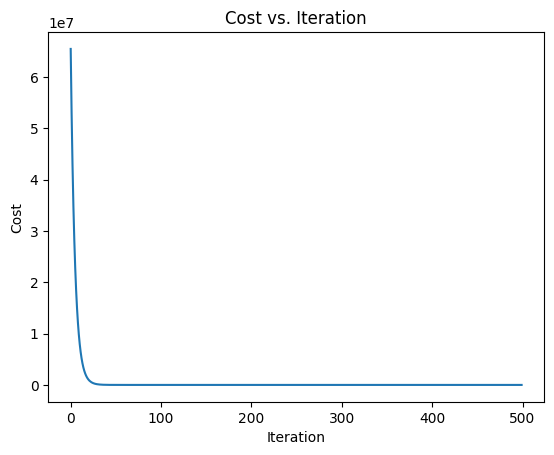

In [10]:
# Graph: Cost vs Iteration
plt.plot(range(iteration), cost_list)
plt.title('Cost vs. Iteration')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.show()

In [11]:
# Checking R-2 Score
pred = np.dot(X_val,theta)
ssr = np.sum((pred - np.mean(y_val))**2)
sse = np.sum((y_val - pred)**2)
r2_score = 1 - (sse / (ssr + sse))
print(f'R-squared score on validation set: {r2_score}')

R-squared score on validation set: 0.9999999999246252


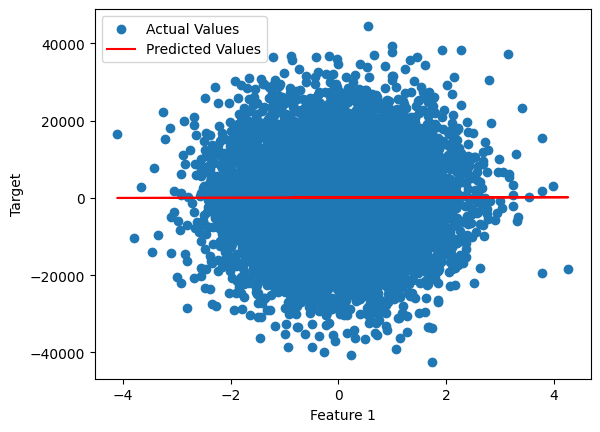

In [61]:
graph = np.dot(X_val[:,0:2],theta[:2])
# Actual vs Predicted values plot
plt.scatter(X_val[:, 1], y_val, label='Actual Values')
plt.plot(X_val[:, 1], graph,color="r", label='Predicted Values')
plt.xlabel("Feature 1")
plt.ylabel('Target')
plt.legend()
plt.show()

In [13]:
# Loading Test data
test = pd.read_csv("Lineardata_test.csv")

# Extracting features and target variable
test=test.values
X_test = test[:, 1:]


# Normalization of features variable
X_test = normalize(X_test)

# Adding column of ones
ones_column = np.ones((X_test.shape[0], 1))
X_test = np.concatenate((ones_column, X_test), axis=1)

In [14]:
# Predicting Values on Test Data
y_pred = np.dot(X_test,theta)
print(y_pred)

[[ -5438.62628766]
 [ 17662.60938195]
 [  4674.8857198 ]
 ...
 [  9529.84886252]
 [-15179.26678133]
 [ -1419.52091202]]


In [22]:
column_names = ['target'] + [f'features_{i}' for i in range(1,21)]
Result = pd.DataFrame(data=np.column_stack([y_pred, test[:, 1:]]), columns=column_names)
Result
# file_path = "Linear_output.csv"
# Result.to_csv(file_path, index=False)

,target,features_1,features_2,features_3,features_4,features_5,features_6,features_7,features_8,features_9,...,features_11,features_12,features_13,features_14,features_15,features_16,features_17,features_18,features_19,features_20
0,-5438.626288,0.634260,-0.771727,4.297694,-2.022710,0.487001,2.316767,11.626397,-10.657142,9.254734,...,-8.728623,7.035966,5.828558,8.596358,-16.510202,-132.396813,12.213839,21.383123,-37.841857,18.892385
1,17662.609382,0.456128,3.154433,0.182006,-0.730634,-5.759530,1.448589,-10.292540,20.441249,9.943525,...,-4.899841,20.762134,-4.117988,-12.677107,-40.923007,367.557009,21.607952,-1.207279,-28.154185,-3.603744
2,4674.885720,0.390815,-5.278284,1.625943,-1.775914,-2.461865,1.439888,6.213269,-17.212310,-17.308743,...,8.239316,6.588928,27.017658,-1.806317,-18.574372,-39.807081,-18.389553,7.466803,49.904659,46.990062
3,2722.949226,1.067949,4.851061,3.909243,2.005500,2.880720,1.054944,-1.652801,-4.267849,3.860784,...,-4.580152,5.748974,6.949329,-2.369054,-6.953435,23.932892,-1.575264,-34.352606,16.941476,5.104177
4,3444.554103,-0.589611,-3.533016,-1.705736,2.063013,-0.738696,2.475443,-4.982819,-19.693204,0.660739,...,2.222820,-11.731821,-8.069874,-5.881325,-26.060090,244.017215,-23.257490,9.819982,-34.672912,9.324556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,4183.175598,1.967136,-6.819440,3.597360,-0.482508,4.679231,0.861442,8.810749,-20.384415,20.427585,...,1.489196,12.767614,52.530303,20.517596,-42.428871,35.227784,-9.244004,-18.759314,-42.260514,-2.261597
9996,-16046.042193,-0.656285,-3.294604,12.222256,-0.184108,8.286414,-6.437312,-19.611691,-13.487207,23.986240,...,9.897794,-15.720693,26.401396,11.421553,-104.558180,-318.607244,-7.446830,-6.457686,12.002813,-20.317446
9997,9529.848863,-0.349932,4.611955,-2.814735,1.851754,-2.354195,6.639817,-25.299515,-3.145723,-41.248652,...,19.601819,-3.216492,-17.299449,-8.975811,59.531358,244.333157,28.656620,11.294024,1.441938,4.395482
9998,-15179.266781,0.295833,1.825552,-8.824731,2.119270,-4.629213,-2.354794,0.919091,52.204003,7.350877,...,10.640964,11.686231,7.259193,7.733906,54.680591,-472.335102,-24.281308,-16.099344,10.744757,6.578695
